# VGG

```{note}
随着网络的加深，CNN的设计难度越来越高，VGG使用了模块化的思想来解决这个问题
```

## 结构

VGG使用网络块来构建我们的模型，一个网络块由两部分组成：

1. 数个维持分辨率的卷积层 + 激活函数如ReLU

3. 一个 pooling 层如 max-pooling

而VGG是由数个这样的网络块再加数个全连接层组成的，这样是不是清晰很多！

下图对比了AlexNet和VGG（我们要实现的VGG是其简易版）。

![jupyter](../images/conv/vgg.svg)

## 实现

In [1]:
import torch
from torch import nn


def vgg_block(num_convs, in_channels, out_channels):
    """VGG的网络块"""
    layers = []
    for _ in range(num_convs):
        # kernel_size=3，padding=1以维持分辨率
        layers.append(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        # 在第一个卷积层改变通道数
        in_channels = out_channels
    # 最后加上pooling
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    # 顺序模块
    return nn.Sequential(*layers)

In [2]:
# 2个块，（快的卷积层数，output_channel）
conv_arch = ((1, 64), (2, 128))


def vgg(conv_arch):
    conv_blks = []
    # 灰白照片input_channel为1
    in_channels = 1
    # 卷积部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        # *用来解包序列
        *conv_blks, nn.Flatten(),
        # 全连接部分
        nn.Linear(out_channels * 7 * 7, 1024), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(1024, 10))


net = vgg(conv_arch)

In [3]:
X = torch.randn(size=(1, 1, 28, 28))
# 打印各部分的shape
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 14, 14])
Sequential output shape:	 torch.Size([1, 128, 7, 7])
Flatten output shape:	 torch.Size([1, 6272])
Linear output shape:	 torch.Size([1, 1024])
ReLU output shape:	 torch.Size([1, 1024])
Dropout output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## 训练

In [4]:
import d2l

# 载入数据
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

loss 0.304, train acc 0.886750, test acc  0.881700


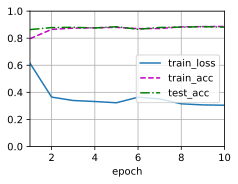

In [5]:
# 训练
lr, num_epochs = 0.01, 10
d2l.train_image_classifier(net, train_iter, test_iter, lr, num_epochs)